In [11]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.pardir)  
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

In [12]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:1000]
t_train = t_train[:1000]

In [13]:
max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

In [14]:
def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784,
                                     hidden_size_list=[100, 100, 100, 100, 100],
                                     output_size=10,
                                     weight_init_std=weight_init_std,
                                     use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784,
                                  hidden_size_list=[100, 100, 100, 100, 100],
                                  output_size=10,
                                  weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - "
                  + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list

============== 1/3 ==============
epoch:0 | 0.117 - 0.119
epoch:1 | 0.116 - 0.485
epoch:2 | 0.116 - 0.676
epoch:3 | 0.116 - 0.746
epoch:4 | 0.116 - 0.828
epoch:5 | 0.116 - 0.897
epoch:6 | 0.117 - 0.935
epoch:7 | 0.117 - 0.962
epoch:8 | 0.117 - 0.978
epoch:9 | 0.117 - 0.985
epoch:10 | 0.117 - 0.988
epoch:11 | 0.117 - 0.989
epoch:12 | 0.117 - 0.996
epoch:13 | 0.117 - 0.995
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.998
epoch:19 | 0.117 - 0.999
============== 2/3 ==============
epoch:0 | 0.1 - 0.091
epoch:1 | 0.126 - 0.194
epoch:2 | 0.175 - 0.384
epoch:3 | 0.269 - 0.555
epoch:4 | 0.348 - 0.65
epoch:5 | 0.438 - 0.72
epoch:6 | 0.48 - 0.782
epoch:7 | 0.53 - 0.821
epoch:8 | 0.566 - 0.841
epoch:9 | 0.634 - 0.859
epoch:10 | 0.646 - 0.876
epoch:11 | 0.679 - 0.887
epoch:12 | 0.707 - 0.9
epoch:13 | 0.721 - 0.912
epoch:14 | 0.748 - 0.923
epoch:15 | 0.772 - 0.932
epoch:16 | 0.78 - 0.938
epoch:17 | 0.795 - 0.944
epoch:18 | 

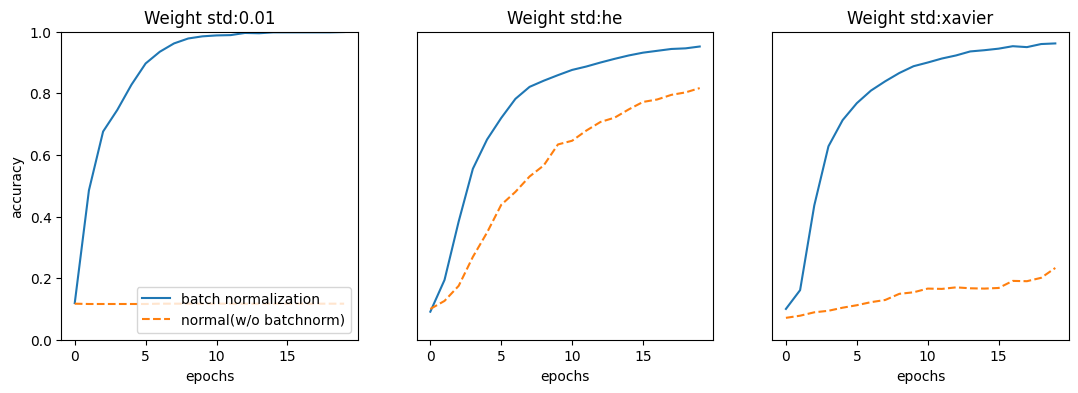

In [15]:
# weight_scale_list = np.logspace(0, -4, num=16)
weight_scale_list = [.01,'he','xavier']
x = np.arange(max_epochs)
plt.figure(figsize=(13, 4))
for i, w in enumerate(weight_scale_list):
    print("============== " + str(i+1) + "/3" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(1, 3, i+1)
    plt.title("Weight std:" + str(w))
    if i == 3:
        plt.plot(x, bn_train_acc_list,
                 label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle="--",
                 label='Normal(without BatchNorm)', markevery=2)
        
    else:
        plt.plot(x, bn_train_acc_list, markevery=2, label="batch normalization")
        plt.plot(x, train_acc_list, linestyle="--", markevery=2, label="normal(w/o batchnorm)")

    plt.ylim(0, 1.0)
    if i % 3:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
        plt.legend(loc='lower right')
    # if i < 4:
    #     plt.xticks([])
    # else:
    plt.xlabel("epochs")
    

plt.show()